## Quantitative Statistical Ecology Programs in Africa

This notebook is specifically dedicated to exploring quantitative statistical ecology programs in Africa. The data presented in this notebook is obtained through Google searches using specific keywords: "top 50 quantitative statistical ecology programs in Africa" and "top 50 statistical ecology programs in Africa". The objective of this notebook is to gather information about quantitative statistical ecology programs offered by African universities.

Please note that the data presented in this notebook is based on publicly available information from Google searches, and the completeness and accuracy of the data may vary.


## Importing libraries and data used in the notebook

In [5]:
import pandas as pd
import warnings

# Suppress FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Transform the data into a DataFrame.
program_df = pd.read_parquet('../data/qantitative_statistical_ecology_programs.parquet')

program_df = program_df.rename(columns={'country': 'Country', 'name': 'University', 'longitude': 'longitude', 'latitude': 'latitude'})
# ed DataFrame to a Parquet file
program_df.head(3)


,University,Country
0,University of Cape Town,South Africa
1,Stellenbosch University,South Africa
2,Rhodes University,South Africa


#### Adding longitude and latitude coordinates using geopy

We can use the Geopy library to add longitude and latitude coordinates to the existing data entries.

In [2]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def add_coordinates(df, uni_address_column, coun_address_column):
    """
    This function enables you to extract latitude and longitude coordinates 
    by geocoding university addresses and country addresses within a DataFrame
       Inputs:
            df: A DataFrame that contains the data to be processed. It should have columns corresponding to the university address and the country name
            uni_address_column: The column name or index representing the university address in the DataFrame
            coun_address_column: The column name or index representing the country name in the DataFrame
        Outputs:
            df: The updated DataFrame with additional columns for latitude and longitude

    """
    geolocator = Nominatim(user_agent="university-locator")
    df['latitude'] = None
    df['longitude'] = None

    def geocode_with_timeout(address):
        try:
            location = geolocator.geocode(address)
            return location
        except GeocoderTimedOut:
            return geocode_with_timeout(address)
        except Exception as e:
            return None

    for index, row in df.iterrows():
        uni_address = row[uni_address_column]
        coun_address = row[coun_address_column]
        location = geocode_with_timeout(uni_address)

        if location is None:
            location = geocode_with_timeout(coun_address)

        if location:
            df.at[index, 'latitude'] = location.latitude
            df.at[index, 'longitude'] = location.longitude

    return df

try:
    df_with_coordinates = pd.read_parquet('../data/qantitative_statistical_ecology_programs_coordinates.parquet')
     
except FileNotFoundError:
    df_with_coordinates = add_coordinates(program_df, 'University', 'Country')
    df_with_coordinates.to_parquet('../data/qantitative_statistical_ecology_programs_coordinates.parquet')

df_with_coordinates

,University,Country,latitude,longitude
0,University of Cape Town,South Africa,-33.956756,18.467578
1,Stellenbosch University,South Africa,-33.931522,18.867666
2,Rhodes University,South Africa,-33.314189,26.516430
3,Nelson Mandela University,South Africa,-29.110668,26.186476
4,University of the Witwatersrand,South Africa,-26.188877,28.024791
5,University of KwaZulu-Natal,South Africa,-29.867816,30.979684
6,University of Pretoria,South Africa,-25.651375,28.179387
7,University of the Western Cape,South Africa,-33.932730,18.628640
8,University of Nairobi,Kenya,-1.255167,36.724810
9,Egerton University,Kenya,-0.368569,35.932296


#### Plot
plot the locations of quantitative statistical ecology programs in Africa on a map, providing a visual representation of their distribution across the continent.

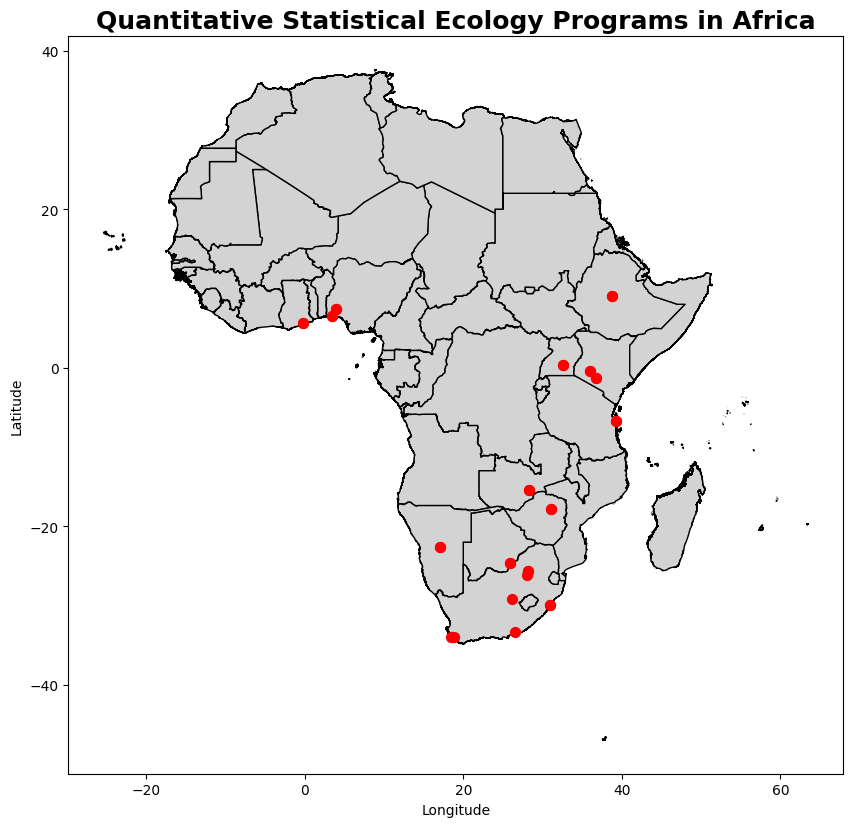

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
from plot_script import map_plot
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the child directory or file
child_name = "../afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the desired child directory or file name

# Construct the path to the child directory or file
child_path = os.path.join(notebook_path, child_name)
 
 
africa_shapefile = child_path # Replace with the actual file path

map_plot(africa_shapefile,df_with_coordinates,"Quantitative Statistical Ecology Programs in Africa")